In [68]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv("csv/prelims_csv/gameandgrade.csv")

# Clean Data because of typo error on the csv file with Grade having a double dot (eg. 92..00)
data = data[~data["Grade"].astype(str).str.contains(r"\.\..", regex=True)]
# Convert Grade column into Numeric Value (invalid values and non-numeric values = NaN)
data["Grade"] = pd.to_numeric(data["Grade"], errors="coerce")
# Remove NaN (previously invalid and non-numeric values) fron the data set
data.dropna(subset=["Grade"], inplace=True)

# Remove duplicated data
data = data[data.duplicated() == False]
data.duplicated().sum()

# Check cleaned data
data.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [70]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               753 non-null    int64  
 1   School Code       753 non-null    int64  
 2   Playing Years     753 non-null    int64  
 3   Playing Often     753 non-null    int64  
 4   Playing Hours     753 non-null    int64  
 5   Playing Games     753 non-null    int64  
 6   Parent Revenue    753 non-null    int64  
 7   Father Education  753 non-null    int64  
 8   Mother Education  753 non-null    int64  
 9   Grade             753 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 64.7 KB


,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.509960,4.887118,1.620186,2.293493,1.521912,0.722444,1.867198,3.699867,3.385126,77.134834
std,0.500233,2.994988,1.402587,1.915134,1.333832,0.451049,1.049772,1.169294,1.165959,16.415164
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000
50%,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,3.000000,4.000000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000


In [71]:
X = data[["Playing Hours"]]
Y = data["Grade"]

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
print("Training Set:")
print(X_train)
print(Y_train)

print ("\n Testing Set:")
print(X_test)
print(Y_test)



Training Set:
     Playing Hours
593              3
131              1
44               3
70               0
588              2
..             ...
71               2
106              0
270              0
439              2
102              1

[602 rows x 1 columns]
593     87.00
131     57.75
44      69.00
70      90.00
588     60.00
        ...  
71      70.00
106     72.50
270     70.00
439    100.00
102     70.00
Name: Grade, Length: 602, dtype: float64

 Testing Set:
     Playing Hours
732              0
667              2
374              2
77               2
212              1
..             ...
333              2
90               0
357              0
668              0
69               2

[151 rows x 1 columns]
732     70.5
667     72.5
374     55.0
77      85.0
212     55.0
       ...  
333     92.5
90     100.0
357     70.0
668     46.5
69      65.0
Name: Grade, Length: 151, dtype: float64


In [74]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [75]:
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coeffecient: {model.coef_[0]:.2f}")

Intercept: 79.04
Coeffecient: -1.20


In [76]:
Y_pred = model.predict(X_test)

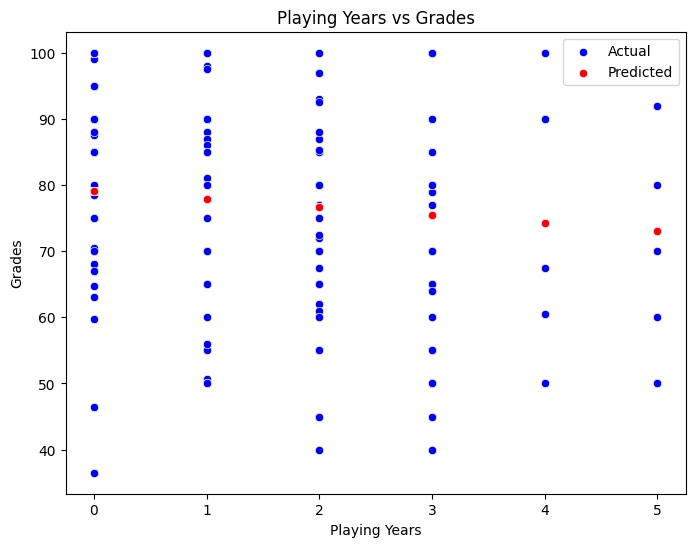

In [ ]:
plt.figure(figsize=(8,6))
#scatter plot of actual data
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")
#scatter plot of Predicted data
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Playing Hours")
plt.ylabel("Grades")
plt.title("Playing Hours vs Grades")
plt.legend()
plt.show()



In [78]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"r2 Score: {r2:.2f}")

Mean Squared Error: 282.25
r2 Score: 0.04
